##Sem filtro

### Inicio

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving simulation.dat to simulation.dat


In [ ]:
import pandas as pd

# Obter o nome do arquivo carregado
filename = list(uploaded.keys())[0]

# Ler o arquivo de texto com valores separados por ponto e vírgula
df = pd.read_csv(filename, sep=';')

# Exibir as primeiras linhas da tabela
print(df.head())

      X     Y     Z     E        R1         R2        R3         R4  \
0  1.27 -3.54  0.68  28.6  9.515428   6.806269  1.023835   1.914279   
1  0.94 -1.02  0.40   6.2  6.024317  37.526170  4.963905  36.495460   
2  3.41  2.00 -0.39  14.0  0.000000   0.000000  0.000000   0.000000   
3  1.90  2.01  4.91  11.5  0.000000   0.000000  0.928060   0.000000   
4  0.04 -2.87  3.81  19.9  6.326147   1.859650  9.455535   0.000000   

          R5        R6        R7        R8         R9         R10  R11  \
0   1.015176  1.002674  0.000000  0.000000  16.288050  107.022789  0.0   
1  10.933460  4.922943  1.018797  2.058536   0.967650    1.015545  0.0   
2   0.000000  0.981137  0.000000  1.055024   0.000000    0.000000  0.0   
3   0.000000  0.000000  0.000000  0.000000   1.029773    0.000000  0.0   
4   1.055941  0.000000  0.000000  0.000000   1.035381    1.077360  0.0   

        R12       R13       R14  R15  R16  
0  2.081149  0.000000  0.000000  0.0  0.0  
1  0.000000  0.000000  0.000000  0.0  0.

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.17.0


In [ ]:
df_xlsx = df

In [ ]:
dataset = df_xlsx.copy()
dataset.tail()

,X,Y,Z,E,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R11,R12,R13,R14,R15,R16
9741,2.38,-1.18,2.42,17.1,7.167457,4.632091,20.344559,17.541428,15.542594,2.023115,2.016452,1.016909,1.945552,5.070315,0.0,0.00000,0.000000,1.014756,0.000000,0.000000
9742,0.78,2.82,-1.83,20.9,0.000000,1.033020,0.000000,1.012493,1.038499,3.972295,0.000000,1.105455,1.037551,0.000000,0.0,0.00000,1.001308,1.985179,0.000000,0.000000
9743,-1.99,2.34,0.37,9.7,0.000000,0.000000,0.000000,3.236333,4.655306,8.175450,5.778087,22.351751,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,7.978880,10.725452
9744,0.01,1.14,2.17,28.9,1.098477,3.882273,17.023481,48.129949,269.796831,49.321128,136.485682,112.627212,0.000000,0.000000,0.0,1.03925,0.000000,3.949672,1.001086,0.000000
9745,-1.45,0.88,3.57,22.0,0.986700,0.000000,5.221455,0.912653,6.924227,0.000000,4.038074,3.027421,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.909269,1.990136


In [ ]:
nan_values = dataset.isna().sum().sum()

if nan_values > 0:
    print("Existem valores NaN na tabela.")
    print("Número total de valores NaN:", nan_values)
else:
    print("Não há valores NaN na tabela.")

Não há valores NaN na tabela.


In [ ]:
# Substituir NaN pelo valor médio da coluna correspondente
coluna_com_nan = 'X'
media_coluna = dataset[coluna_com_nan].mean()

# Substituir NaN pelo valor médio da coluna
dataset[coluna_com_nan].fillna(media_coluna, inplace=True)

In [ ]:
# Substituir NaN pelo valor médio da coluna correspondente
coluna_com_nan_2 = 'Y'
media_coluna = dataset[coluna_com_nan_2].mean()

# Substituir NaN pelo valor médio da coluna
dataset[coluna_com_nan_2].fillna(media_coluna, inplace=True)

### Começo da Separacao do Dataset

In [ ]:
# final_validation_dataset = dataset.sample(n=745)
# used_dataset = dataset.drop(final_validation_dataset.index)
used_dataset = dataset

In [ ]:
print(used_dataset.shape)

(9746, 20)


In [ ]:
train_dataset = used_dataset.sample(frac=0.8, random_state=0)
test_dataset = used_dataset.drop(train_dataset.index)

In [ ]:
print(train_dataset.shape)

(7797, 20)


In [ ]:
print(dataset.shape)

(9746, 20)


In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,7797.0,0.025081,1.974856,-3.43,-1.68,0.030000,1.720000,3.430000
Y,7797.0,0.023390,2.449604,-4.26,-2.10,0.040000,2.130000,4.260000
Z,7797.0,1.500720,2.453552,-2.77,-0.61,1.480000,3.610000,5.760000
E,7797.0,17.304989,7.131574,1.80,11.20,17.300000,23.400000,29.900000
R1,7797.0,8.420502,74.084591,0.00,0.00,0.000000,2.025321,2816.648067
R2,7797.0,7.554628,59.066818,0.00,0.00,0.000000,2.209139,2593.338655
R3,7797.0,8.104281,53.225875,0.00,0.00,0.942467,3.002801,1915.881660
R4,7797.0,9.887158,78.149210,0.00,0.00,0.990505,3.746136,4175.964805
R5,7797.0,10.437017,86.904703,0.00,0.00,0.991684,3.478335,5318.076744
R6,7797.0,7.942123,51.322253,0.00,0.00,0.948916,3.045485,2315.587809


In [ ]:
final_validation_dataset.describe().transpose()

NameError: name 'final_validation_dataset' is not defined

### TREINO DO X

In [ ]:
train_features_x = train_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]


test_features_x = test_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

#print (train_features_x)

In [ ]:
train_labels_x = train_dataset[['X']]
test_labels_x = test_dataset[['X']]

print(train_labels_x.shape)

### TREINO DO Y

In [ ]:
train_features_y = train_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]


test_features_y = test_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

#print (train_features_y)

In [ ]:
train_labels_y = train_dataset[['Y']]
test_labels_y = test_dataset[['Y']]

#print(test_labels_y)

### TREINO DO Z

In [ ]:
train_features_z = train_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]


test_features_z = test_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

#print (train_features_z)

In [ ]:
train_labels_z = train_dataset[['Z']]
test_labels_z = test_dataset[['Z']]

#print(test_labels_z)

### TREINO DA Energia

In [ ]:
train_features_e = train_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]


test_features_e = test_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

#print (train_features_e)

In [ ]:
train_labels_e = train_dataset[['E']]
test_labels_e = test_dataset[['E']]

#print(test_labels_e)

### Normalização

In [ ]:
nan_values = dataset.isna().sum().sum()

if nan_values > 0:
    print("Existem valores NaN na tabela.")
    print("Número total de valores NaN:", nan_values)
else:
    print("Não há valores NaN na tabela.")

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features_x)) #Aqui, não faz diferença qual das train_features pegamos para a normalização, pois todas são R1 a R16
print(normalizer.mean.numpy())

In [ ]:
first = np.array(train_features_x[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

### Definições do Modelo

In [ ]:
 def build_and_compile_model(norm):
   model = keras.Sequential([
       norm,
       layers.Dense(64, activation='relu'),
       layers.Dense(64, activation='relu'),
       layers.Dense(64, activation='relu'),
       layers.Dense(64, activation='relu'),
       layers.Dense(1)
   ])

   model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
   return model

In [ ]:
# from tensorflow.keras import layers, Sequential
# from tensorflow.keras.layers.experimental import preprocessing

# def build_and_compile_model(norm):
#     model = Sequential([
#         norm,
#         layers.Dense(64, activation=layers.ReLU(negative_slope=1)),
#         layers.Dense(64, activation=layers.ReLU(negative_slope=1)),
#         layers.Dense(1)
#     ])

#     model.compile(loss='mean_absolute_error',
#                   optimizer=tf.keras.optimizers.Adam(0.001))
#     return model


In [ ]:
test_results = {} # Para apenas colocar a loss de cada um dos 4 treinos em uma tabela

In [ ]:
test_results_final_validation_dataset = {} # Dicionario para colocar a loss referente ao final_validation_dataset

### Funções de Plot

#### Com val_loss

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([5.5, 16])
  plt.xlabel('Epoch')
  plt.ylabel('Error [X]')
  plt.legend()
  plt.grid(True)

#### Sem val_loss

In [ ]:
# def plot_loss(history):
#     plt.plot(history.history['loss'])
#     plt.title('Model loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.show()

### REDE NEURAL DO X

In [ ]:
dnn_model_x = build_and_compile_model(normalizer)
dnn_model_x.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 16)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [ ]:
%%time
history = dnn_model_x.fit(
    train_features_x,
    train_labels_x,
    batch_size=20,
    validation_split=0.2,
    verbose=2, epochs=75)

Epoch 1/75
312/312 - 3s - 8ms/step - loss: 1.6818 - val_loss: 1.6078
Epoch 2/75
312/312 - 1s - 2ms/step - loss: 1.6139 - val_loss: 1.5367
Epoch 3/75
312/312 - 1s - 4ms/step - loss: 1.5142 - val_loss: 1.4245
Epoch 4/75
312/312 - 1s - 2ms/step - loss: 1.3767 - val_loss: 1.2702
Epoch 5/75
312/312 - 1s - 2ms/step - loss: 1.2082 - val_loss: 1.0962
Epoch 6/75
312/312 - 1s - 3ms/step - loss: 1.0560 - val_loss: 0.9838
Epoch 7/75
312/312 - 1s - 3ms/step - loss: 0.9773 - val_loss: 0.9209
Epoch 8/75
312/312 - 1s - 4ms/step - loss: 0.9334 - val_loss: 0.8790
Epoch 9/75
312/312 - 1s - 4ms/step - loss: 0.9006 - val_loss: 0.8518
Epoch 10/75
312/312 - 1s - 4ms/step - loss: 0.8757 - val_loss: 0.8251
Epoch 11/75
312/312 - 1s - 4ms/step - loss: 0.8582 - val_loss: 0.8074
Epoch 12/75
312/312 - 1s - 2ms/step - loss: 0.8476 - val_loss: 0.7978
Epoch 13/75
312/312 - 1s - 2ms/step - loss: 0.8310 - val_loss: 0.7950
Epoch 14/75
312/312 - 1s - 4ms/step - loss: 0.8217 - val_loss: 0.7828
Epoch 15/75
312/312 - 1s - 2m

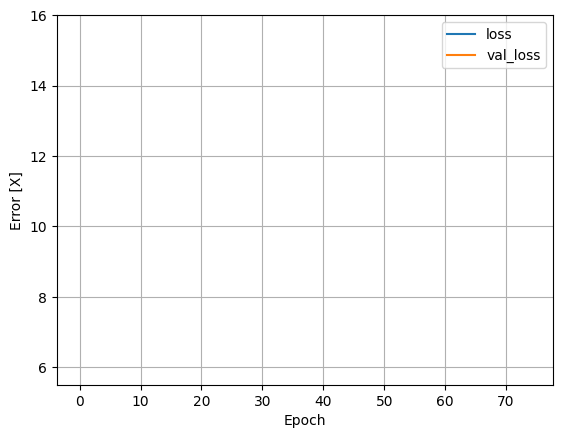

In [ ]:
plot_loss(history)

In [ ]:
test_results['x'] = dnn_model_x.evaluate(test_features_x, test_labels_x, verbose=2)

61/61 - 0s - 4ms/step - loss: 0.7278


In [ ]:
#final_validation_features_x = final_validation_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

In [ ]:
#final_validation_labels_x = final_validation_dataset[['X']]

In [ ]:
#test_results_final_validation_dataset['x_relu'] = dnn_model_x.evaluate(final_validation_features_x, final_validation_labels_x, verbose=2)

24/24 - 0s - loss: 0.7497 - 55ms/epoch - 2ms/step


### REDE NEURAL DO Y

In [ ]:
dnn_model_y = build_and_compile_model(normalizer)
dnn_model_y.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (7797, 16)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [ ]:
%%time
history = dnn_model_y.fit(
    train_features_y,
    train_labels_y,
    batch_size=20,
    validation_split=0.2,
    verbose=2, epochs=75)

Epoch 1/75
312/312 - 3s - 9ms/step - loss: 2.0369 - val_loss: 1.9751
Epoch 2/75
312/312 - 1s - 3ms/step - loss: 1.8024 - val_loss: 1.6390
Epoch 3/75
312/312 - 1s - 4ms/step - loss: 1.4069 - val_loss: 1.2632
Epoch 4/75
312/312 - 2s - 6ms/step - loss: 1.1218 - val_loss: 1.0613
Epoch 5/75
312/312 - 3s - 8ms/step - loss: 1.0112 - val_loss: 0.9868
Epoch 6/75
312/312 - 1s - 5ms/step - loss: 0.9481 - val_loss: 0.9330
Epoch 7/75
312/312 - 1s - 3ms/step - loss: 0.9096 - val_loss: 0.9157
Epoch 8/75
312/312 - 1s - 4ms/step - loss: 0.8715 - val_loss: 0.8814
Epoch 9/75
312/312 - 1s - 3ms/step - loss: 0.8383 - val_loss: 0.8250
Epoch 10/75
312/312 - 1s - 4ms/step - loss: 0.8115 - val_loss: 0.8012
Epoch 11/75
312/312 - 1s - 4ms/step - loss: 0.7860 - val_loss: 0.7802
Epoch 12/75
312/312 - 1s - 4ms/step - loss: 0.7672 - val_loss: 0.7547
Epoch 13/75
312/312 - 1s - 3ms/step - loss: 0.7474 - val_loss: 0.7511
Epoch 14/75
312/312 - 1s - 4ms/step - loss: 0.7315 - val_loss: 0.7400
Epoch 15/75
312/312 - 1s - 4m

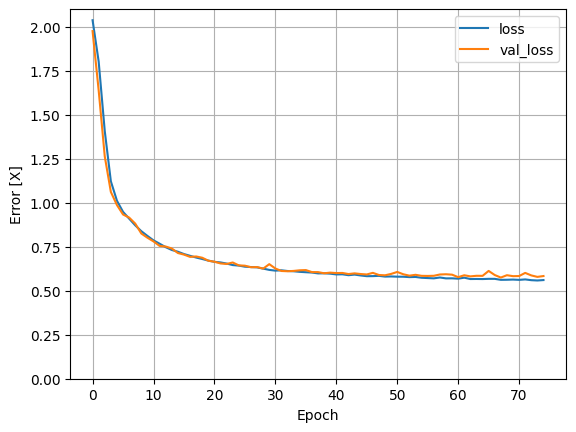

In [ ]:
plot_loss(history)

In [ ]:
test_results['y'] = dnn_model_y.evaluate(test_features_y, test_labels_y, verbose=2)

61/61 - 0s - 6ms/step - loss: 0.5771


### REDE NEURAL DO Z

In [ ]:
dnn_model_z = build_and_compile_model(normalizer)
dnn_model_z.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 16)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [ ]:
%%time
history = dnn_model_z.fit(
    train_features_z,
    train_labels_z,
    batch_size=20,
    validation_split=0.2,
    verbose=2, epochs=75)

Epoch 1/75
312/312 - 3s - 8ms/step - loss: 2.2833 - val_loss: 2.1918
Epoch 2/75
312/312 - 1s - 4ms/step - loss: 2.1773 - val_loss: 2.0662
Epoch 3/75
312/312 - 1s - 2ms/step - loss: 2.0861 - val_loss: 1.9738
Epoch 4/75
312/312 - 1s - 2ms/step - loss: 2.0222 - val_loss: 1.9193
Epoch 5/75
312/312 - 1s - 2ms/step - loss: 1.9541 - val_loss: 1.8554
Epoch 6/75
312/312 - 1s - 2ms/step - loss: 1.8755 - val_loss: 1.7832
Epoch 7/75
312/312 - 1s - 2ms/step - loss: 1.8003 - val_loss: 1.7151
Epoch 8/75
312/312 - 1s - 2ms/step - loss: 1.7291 - val_loss: 1.6503
Epoch 9/75
312/312 - 2s - 5ms/step - loss: 1.6700 - val_loss: 1.5891
Epoch 10/75
312/312 - 1s - 4ms/step - loss: 1.6112 - val_loss: 1.5377
Epoch 11/75
312/312 - 1s - 2ms/step - loss: 1.5552 - val_loss: 1.4949
Epoch 12/75
312/312 - 1s - 4ms/step - loss: 1.5074 - val_loss: 1.4447
Epoch 13/75
312/312 - 1s - 2ms/step - loss: 1.4609 - val_loss: 1.4054
Epoch 14/75
312/312 - 1s - 4ms/step - loss: 1.4216 - val_loss: 1.3707
Epoch 15/75
312/312 - 1s - 2m

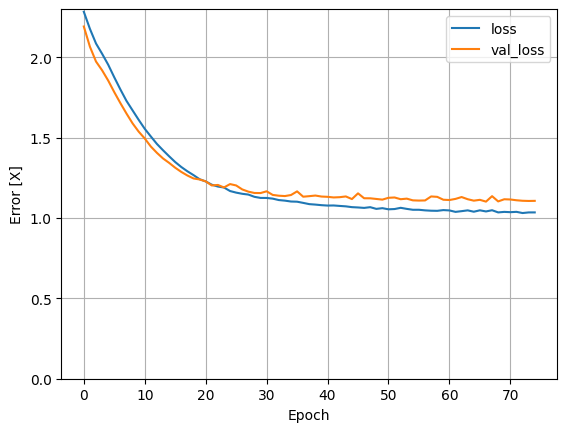

In [ ]:
plot_loss(history)

In [ ]:
test_results['z'] = dnn_model_z.evaluate(test_features_z, test_labels_z, verbose=2)

61/61 - 0s - 5ms/step - loss: 1.1370


### REDE NEURAL DA Energia

In [ ]:
dnn_model_e = build_and_compile_model(normalizer)
dnn_model_e.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 16)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [ ]:
%%time
history = dnn_model_e.fit(
    train_features_e,
    train_labels_e,
    batch_size=20,
    validation_split=0.2,
    verbose=2, epochs=75)

Epoch 1/75
312/312 - 3s - 8ms/step - loss: 15.6995 - val_loss: 11.1875
Epoch 2/75
312/312 - 1s - 5ms/step - loss: 8.4276 - val_loss: 7.7410
Epoch 3/75
312/312 - 1s - 3ms/step - loss: 7.4482 - val_loss: 7.3663
Epoch 4/75
312/312 - 1s - 3ms/step - loss: 7.0903 - val_loss: 7.0511
Epoch 5/75
312/312 - 1s - 3ms/step - loss: 6.7960 - val_loss: 6.7886
Epoch 6/75
312/312 - 1s - 4ms/step - loss: 6.5518 - val_loss: 6.5723
Epoch 7/75
312/312 - 1s - 2ms/step - loss: 6.3598 - val_loss: 6.3721
Epoch 8/75
312/312 - 1s - 4ms/step - loss: 6.2248 - val_loss: 6.2117
Epoch 9/75
312/312 - 1s - 2ms/step - loss: 6.1342 - val_loss: 6.1567
Epoch 10/75
312/312 - 1s - 2ms/step - loss: 6.0953 - val_loss: 6.1273
Epoch 11/75
312/312 - 1s - 2ms/step - loss: 6.0590 - val_loss: 6.0539
Epoch 12/75
312/312 - 1s - 4ms/step - loss: 6.0372 - val_loss: 6.0790
Epoch 13/75
312/312 - 1s - 2ms/step - loss: 6.0318 - val_loss: 6.0119
Epoch 14/75
312/312 - 1s - 4ms/step - loss: 6.0176 - val_loss: 5.9788
Epoch 15/75
312/312 - 1s - 

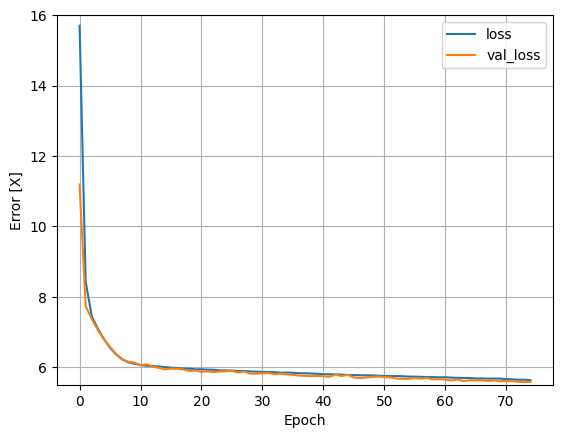

In [ ]:
plot_loss(history)

In [ ]:
test_results['e'] = dnn_model_e.evaluate(test_features_e, test_labels_e, verbose=2)

61/61 - 0s - 3ms/step - loss: 5.7864


In [ ]:
#final_validation_features_e = final_validation_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

In [ ]:
#final_validation_labels_e = final_validation_dataset[['E']]

In [ ]:
#test_results_final_validation_dataset['e_mish'] = dnn_model_e.evaluate(final_validation_features_e, final_validation_labels_e, verbose=2)

24/24 - 0s - loss: 5.8747 - 71ms/epoch - 3ms/step


### REDE NEURAL geral


In [ ]:
dnn_model_geral = keras.models.Sequential([
    normalizer,
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(4)
])

dnn_model_geral.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 16)                33        
 tion)                                                           
                                                                 
 dense_47 (Dense)            (None, 64)                1088      
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 4)                 260       
                                                                 
Total params: 9701 (37.90 KB)
Trainable params: 9668 (37.77 KB)
Non-trainable params: 33 (136.00 Byte)
________________

In [ ]:
dnn_model_geral.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
%%time

train_labels_geral = train_dataset[['X', 'Y', 'Z', 'E']]

history = dnn_model_geral.fit(
    train_features_e,
    train_labels_geral,
    # batch_size=3,
    validation_split=0.2,
    verbose=2, epochs=20)

Epoch 1/20
180/180 - 0s - loss: 2.0998 - val_loss: 2.1002 - 415ms/epoch - 2ms/step
Epoch 2/20
180/180 - 0s - loss: 2.0944 - val_loss: 2.1034 - 352ms/epoch - 2ms/step
Epoch 3/20
180/180 - 0s - loss: 2.0865 - val_loss: 2.0872 - 338ms/epoch - 2ms/step
Epoch 4/20
180/180 - 0s - loss: 2.0855 - val_loss: 2.1182 - 342ms/epoch - 2ms/step
Epoch 5/20
180/180 - 0s - loss: 2.0815 - val_loss: 2.0832 - 346ms/epoch - 2ms/step
Epoch 6/20
180/180 - 0s - loss: 2.0653 - val_loss: 2.0754 - 358ms/epoch - 2ms/step
Epoch 7/20
180/180 - 0s - loss: 2.0636 - val_loss: 2.0928 - 354ms/epoch - 2ms/step
Epoch 8/20
180/180 - 0s - loss: 2.0547 - val_loss: 2.0591 - 345ms/epoch - 2ms/step
Epoch 9/20
180/180 - 0s - loss: 2.0545 - val_loss: 2.0692 - 358ms/epoch - 2ms/step
Epoch 10/20
180/180 - 0s - loss: 2.0494 - val_loss: 2.0683 - 336ms/epoch - 2ms/step
Epoch 11/20
180/180 - 0s - loss: 2.0489 - val_loss: 2.0502 - 344ms/epoch - 2ms/step
Epoch 12/20
180/180 - 0s - loss: 2.0458 - val_loss: 2.0682 - 343ms/epoch - 2ms/step
E

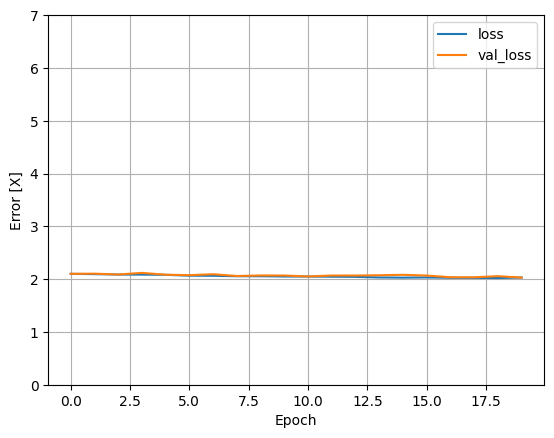

In [ ]:
plot_loss(history)

In [ ]:
test_labels_geral = test_dataset[['X', 'Y', 'Z', 'E']]

test_results['dnn_model_geral'] = dnn_model_geral.evaluate(test_features_e, test_labels_geral, verbose=2)

57/57 - 0s - loss: 2.1250 - 85ms/epoch - 1ms/step


### Gráficos em geral

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error']).T

,Mean absolute error
x,0.727792
y,0.577134
z,1.136963
e,5.786398


In [ ]:
pd.DataFrame(test_results_final_validation_dataset, index=['Mean absolute error']).T

,Mean absolute error
e_relu,5.560871
e_linear,6.126749
e_sigmoid,6.222077
e_softmax,12.151717
e_softplus,5.883056
e_softsign,5.820902
e_tanh,5.777467
e_selu,5.378034
e_elu,5.591904
e_leaky_relu,5.594238


#### Gráficos para X

In [ ]:
# test_predictions_x = dnn_model_geral.predict(test_features_x)

# a = plt.axes(aspect='equal')
# plt.scatter(test_labels_x, test_predictions_x[:, 0])
# plt.xlabel('True Values [X]')
# plt.ylabel('Predictions [X]')
# lims = [-3.5, 3.5]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


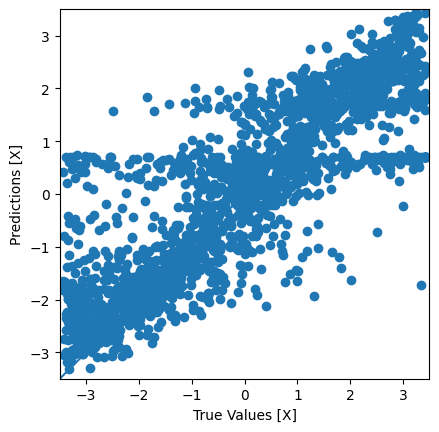

In [ ]:
test_predictions_x = dnn_model_x.predict(test_features_x).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_x, test_predictions_x)
plt.xlabel('True Values [X]')
plt.ylabel('Predictions [X]')
lims = [-3.5, 3.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions_x_reshaped = test_predictions_x.reshape(-1, 1)
print(test_predictions_x_reshaped.shape)

(1949, 1)


In [ ]:
error_x = test_predictions_x_reshaped - test_labels_x

In [ ]:
error_x.shape

(1949, 1)

In [ ]:
media_x = np.mean(error_x)
desvio_padrao_x = np.std(error_x)

print(media_x)

0.09287058649214797


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
print(desvio_padrao_x)

X    1.053181
dtype: float64


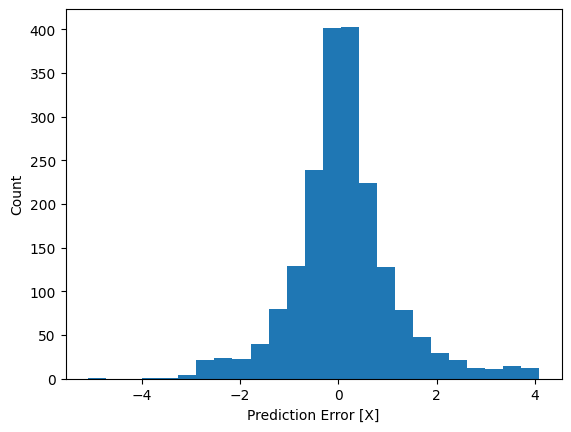

In [ ]:
plt.hist(error_x, bins=25)
plt.xlabel('Prediction Error [X]')
_ = plt.ylabel('Count')

#### Gráficos para Y

57/57 [==============================] - 0s 2ms/step


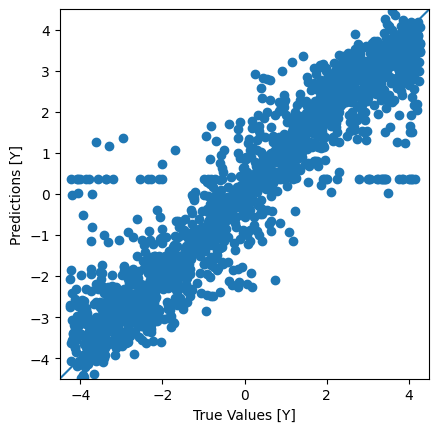

In [ ]:
test_predictions_y = dnn_model_y.predict(test_features_y).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_y, test_predictions_y)
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
lims = [-4.5, 4.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions_y_reshaped = test_predictions_y.reshape(-1, 1)
print(test_predictions_y_reshaped.shape)

(1800, 1)


In [ ]:
error_y = test_predictions_y_reshaped - test_labels_y

In [ ]:
error_y.shape

(1800, 1)

In [ ]:
media_y = np.mean(error_y)
desvio_padrao_y = np.std(error_y)

print(media_y)

0.01789766966522567


In [ ]:
print(desvio_padrao_y)

Y    0.893865
dtype: float64


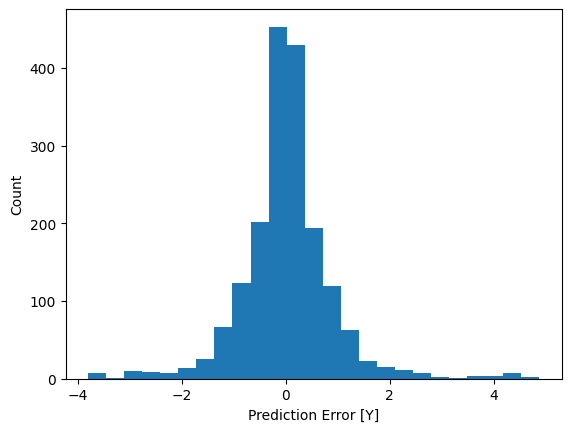

In [ ]:
plt.hist(error_y, bins=25)
plt.xlabel('Prediction Error [Y]')
_ = plt.ylabel('Count')

#### Gráficos para Z

57/57 [==============================] - 0s 2ms/step


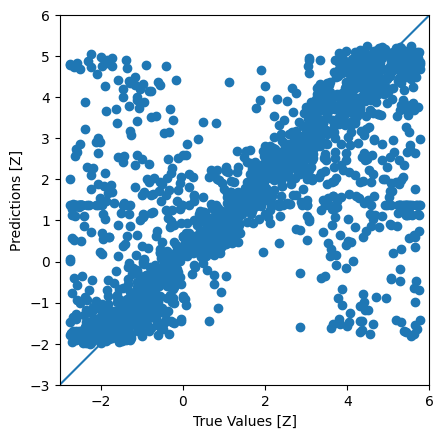

In [ ]:
test_predictions_z = dnn_model_z.predict(test_features_z).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_z, test_predictions_z)
plt.xlabel('True Values [Z]')
plt.ylabel('Predictions [Z]')
lims = [-3, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions_z_reshaped = test_predictions_z.reshape(-1, 1)
print(test_predictions_z_reshaped.shape)

(1800, 1)


In [ ]:
error_z = test_predictions_z_reshaped - test_labels_z

In [ ]:
media_z = np.mean(error_z)
desvio_padrao_z = np.std(error_z)

print(media_z)

0.021378984799732787


In [ ]:
print(desvio_padrao_z)

Z    1.907169
dtype: float64


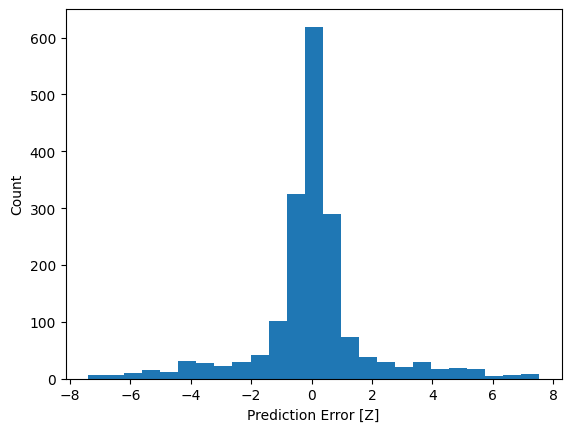

In [ ]:
plt.hist(error_z, bins=25)
plt.xlabel('Prediction Error [Z]')
_ = plt.ylabel('Count')

#### Gráficos para Energia

57/57 [==============================] - 0s 2ms/step


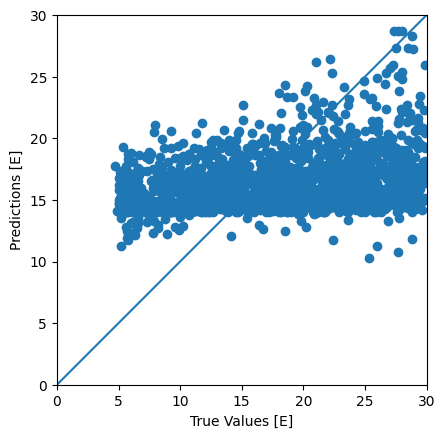

In [ ]:
test_predictions_e = dnn_model_e.predict(test_features_e).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_e, test_predictions_e)
plt.xlabel('True Values [E]')
plt.ylabel('Predictions [E]')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions_e_reshaped = test_predictions_e.reshape(-1, 1)
print(test_predictions_e_reshaped.shape)

(1800, 1)


In [ ]:
error_e = test_predictions_e_reshaped - test_labels_e

In [ ]:
media_e = np.mean(error_e)
desvio_padrao_e = np.std(error_e)

print(media_e)

-1.085127329296536


In [ ]:
print(desvio_padrao_e)

E    6.754262
dtype: float64


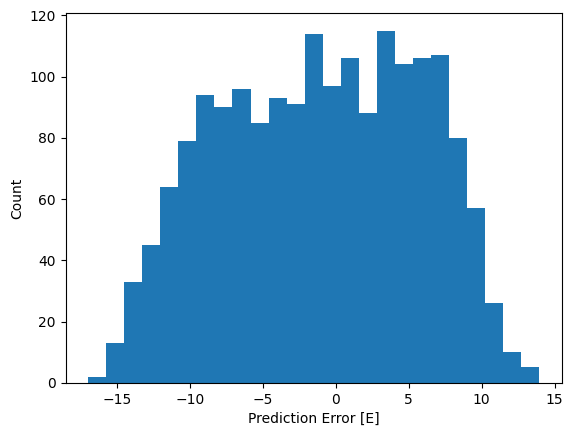

In [ ]:
plt.hist(error_e, bins=25)
plt.xlabel('Prediction Error [E]')
_ = plt.ylabel('Count')

In [ ]:
relative_error_e = np.abs(error_e/test_labels_e)
print(relative_error_e)

             E
0     0.384829
21    0.159275
23    0.324043
27    0.020064
28    0.018140
...        ...
9715  0.078976
9716  1.510241
9718  0.173329
9729  0.115893
9743  0.744041

[1800 rows x 1 columns]


(-17.5, 15.0)

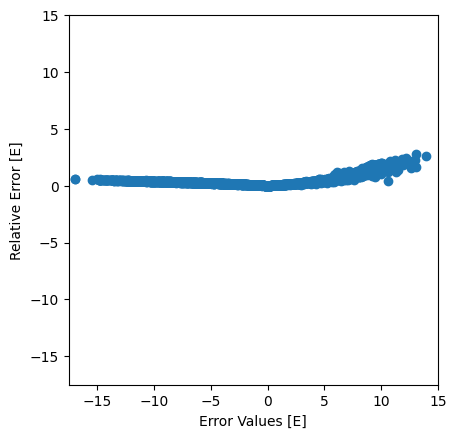

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(error_e, relative_error_e) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('Error Values [E]')
plt.ylabel('Relative Error [E]')
lims = [-17.5, 15]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

### GRAFICOS CONJUNTOS (CORRELAÇÕES)


#### X com Y

In [ ]:
nan_values = error_e.isna().sum().sum()

if nan_values > 0:
    print("Existem valores NaN na tabela.")
    print("Número total de valores NaN:", nan_values)
else:
    print("Não há valores NaN na tabela.")

Não há valores NaN na tabela.


In [ ]:
# Cria uma matriz 2x1800 combinando error_x e error_y
data_xy = np.vstack((error_x.T, error_y.T))

# Calcula a matriz de covariância
cov_matrix_xy = np.cov(data_xy)

# Extraia a covariância entre error_x e error_y
cov_xy = cov_matrix_xy[0, 1]

print("Covariância entre error_x e error_y:", cov_xy)


Covariância entre error_x e error_y: 0.07405291775452488


(-6.0, 6.0)

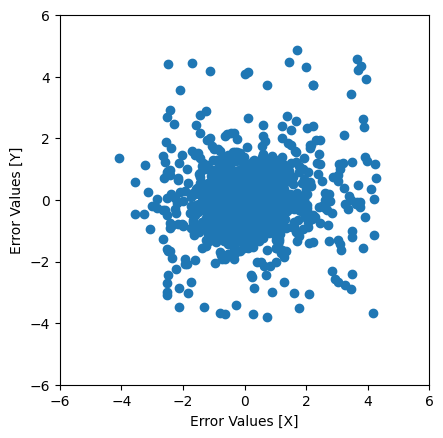

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(error_x, error_y) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('Error Values [X]')
plt.ylabel('Error Values [Y]')
lims = [-6, 6]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

In [ ]:
print(error_x)

             X
0     0.316596
23    0.031364
25   -1.579109
28   -0.747348
29    0.020092
...        ...
9717  0.641210
9718 -0.565884
9721 -0.313623
9731 -0.022639
9743 -0.181709

[1800 rows x 1 columns]


In [ ]:
print(error_y)

             Y
0    -0.398112
23   -0.107468
25    1.382363
28   -0.216144
29   -0.253358
...        ...
9717  0.174091
9718  0.225887
9721 -0.095938
9731  0.023183
9743 -0.040897

[1800 rows x 1 columns]


#### X com Z

In [ ]:
# Cria uma matriz 2x1800 combinando error_x e error_y
data_xz = np.vstack((error_x.T, error_z.T))

# Calcula a matriz de covariância
cov_matrix_xz = np.cov(data_xz)

# Extraia a covariância entre error_x e error_y
cov_xz = cov_matrix_xz[0, 1]

print("Covariância entre error_x e error_z:", cov_xz)

Covariância entre error_x e error_z: -0.05547562887064875


(-8.0, 8.0)

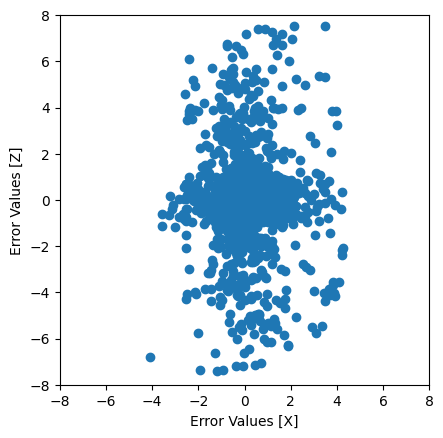

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(error_x, error_z) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('Error Values [X]')
plt.ylabel('Error Values [Z]')
lims = [-8, 8]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

#### Y com Z

In [ ]:
# Cria uma matriz 2x1800 combinando error_y e error_z
data_yz = np.vstack((error_y.T, error_z.T))

# Calcula a matriz de covariância
cov_matrix_yz = np.cov(data_yz)

# Extraia a covariância entre error_y e error_z
cov_yz = cov_matrix_yz[0, 1]

print("Covariância entre error_y e error_z:", cov_yz)

Covariância entre error_y e error_z: -0.01924715710321074


(-8.0, 8.0)

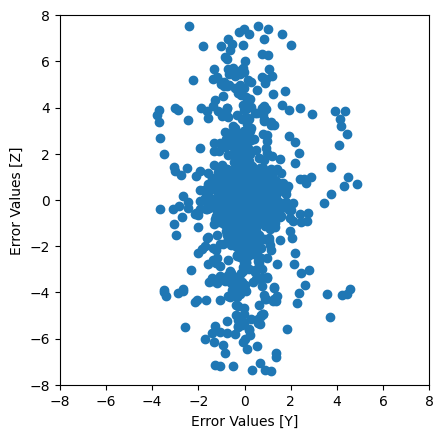

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(error_y, error_z) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('Error Values [Y]')
plt.ylabel('Error Values [Z]')
lims = [-8, 8]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

#### X com E

In [ ]:
# Cria uma matriz 2x1800 combinando error_x e error_e
data_xe = np.vstack((error_x.T, error_e.T))

# Calcula a matriz de covariância
cov_matrix_xe = np.cov(data_xe)

# Extraia a covariância entre error_x e error_e
cov_xe = cov_matrix_xe[0, 1]

print("Covariância entre error_x e error_e:", cov_xe)

Covariância entre error_x e error_e: 0.49248409968237


(-18.0, 15.0)

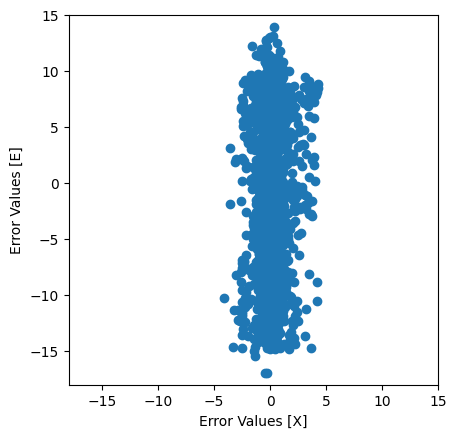

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(error_x, error_e) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('Error Values [X]')
plt.ylabel('Error Values [E]')
lims = [-18, 15]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

#### Y com E

In [ ]:
# Cria uma matriz 2x1800 combinando error_y e error_e
data_ye = np.vstack((error_y.T, error_e.T))

# Calcula a matriz de covariância
cov_matrix_ye = np.cov(data_ye)

# Extraia a covariância entre error_y e error_e
cov_ye = cov_matrix_ye[0, 1]

print("Covariância entre error_y e error_e:", cov_ye)

Covariância entre error_y e error_e: 0.13081197367039185


(-18.0, 15.0)

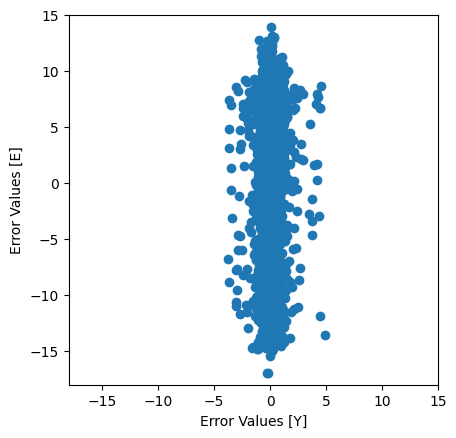

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(error_y, error_e) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('Error Values [Y]')
plt.ylabel('Error Values [E]')
lims = [-18, 15]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

#### Z com E

In [ ]:
# Cria uma matriz 2x1800 combinando error_z e error_e
data_ze = np.vstack((error_z.T, error_e.T))

# Calcula a matriz de covariância
cov_matrix_ze = np.cov(data_ze)

# Extraia a covariância entre error_z e error_e
cov_ze = cov_matrix_ze[0, 1]

print("Covariância entre error_z e error_e:", cov_ze)

Covariância entre error_z e error_e: -0.014583115428086352


(-18.0, 15.0)

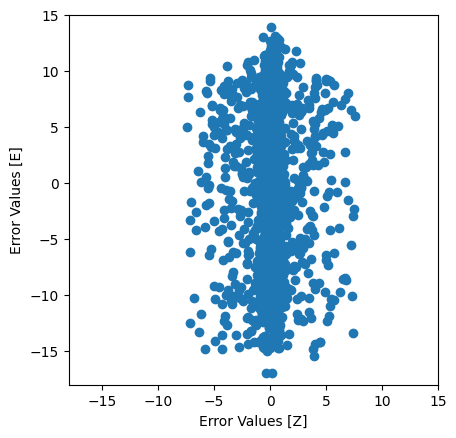

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(error_z, error_e) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('Error Values [Z]')
plt.ylabel('Error Values [E]')
lims = [-18, 15]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

#### Gráficos da energia pelos valores verdadeiros das posições

(-18.0, 15.0)

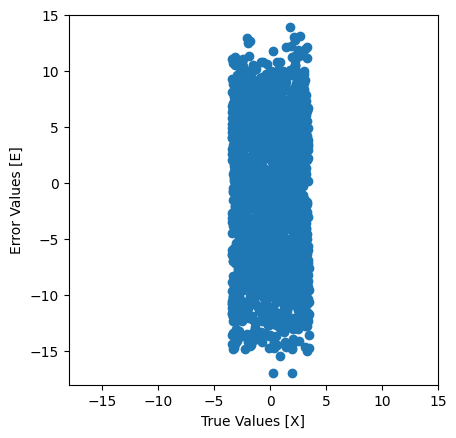

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_x, error_e) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('True Values [X]')
plt.ylabel('Error Values [E]')
lims = [-18, 15]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

(-18.0, 15.0)

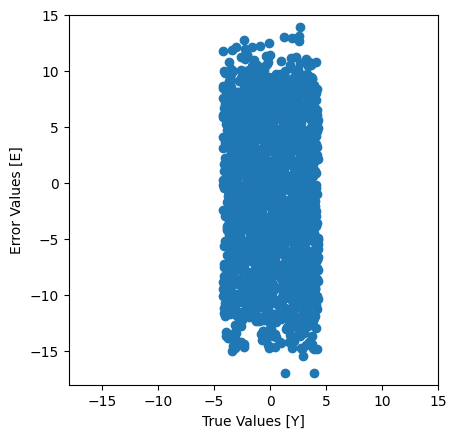

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_y, error_e) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('True Values [Y]')
plt.ylabel('Error Values [E]')
lims = [-18, 15]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

(-18.0, 15.0)

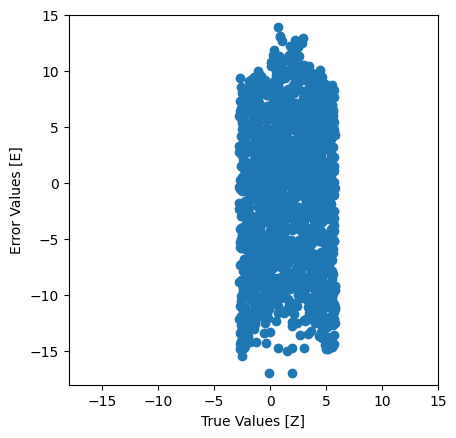

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_z, error_e) #O primeiro é a abscissa e o segundo é a ordenada
plt.xlabel('True Values [Z]')
plt.ylabel('Error Values [E]')
lims = [-18, 15]
plt.xlim(lims)
plt.ylim(lims)
#_ = plt.plot(lims, lims)

## Treino dentro da field cage

#### Dataset filtrado e começo da separação

In [ ]:
# Filtro para X, Y e Z
filtro = (used_dataset['X'] >= -3.42) & (used_dataset['X'] <= 3.42) & \
         (used_dataset['Y'] >= -3.37) & (used_dataset['Y'] <= 3.37) & \
         (used_dataset['Z'] >= 0) & (used_dataset['Z'] <= 2.99)

# Aplicando o filtro ao DataFrame

used_dataset_filtrado = used_dataset[filtro]

print(used_dataset_filtrado.shape)
print(used_dataset_filtrado.head())

(2702, 20)
       X     Y     Z     E          R1         R2          R3         R4  \
1   0.94 -1.02  0.40   6.2    6.024317  37.526170    4.963905  36.495460   
5   1.90  1.75  0.25   1.8    0.000000   0.000000    0.000000   0.979876   
7   1.08  0.93  0.17   9.4    0.000000   4.602870    2.039049  16.335352   
12 -0.16  0.83  1.90  23.5    4.143252   2.165815   17.321910  72.281787   
13  0.90 -2.63  2.06  29.1  378.379006  52.233988  103.434214  22.305204   

             R5         R6         R7         R8       R9        R10  \
1     10.933460   4.922943   1.018797   2.058536  0.96765   1.015545   
5      1.004553   4.026102   1.044533   3.768438  0.00000   0.000000   
7     16.956912  86.580558   4.989148  30.462293  0.00000   0.000000   
12  1132.336542  55.563107  60.197901  62.770084  0.00000   0.000000   
13     9.236527   2.150798   0.973096   2.140251  7.90179  22.213215   

         R11  R12       R13       R14       R15       R16  
1   0.000000  0.0  0.000000  0.000000  

In [ ]:
train_dataset_filtrado = used_dataset_filtrado.sample(frac=0.8, random_state=0)
test_dataset_filtrado = used_dataset_filtrado.drop(train_dataset_filtrado.index)

In [ ]:
train_dataset_filtrado.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,2162.0,-0.045957,1.969180,-3.42,-1.727500,-0.070000,1.690000,3.420000
Y,2162.0,0.089468,1.943667,-3.37,-1.560000,0.130000,1.790000,3.370000
Z,2162.0,1.470014,0.871331,0.00,0.710000,1.450000,2.230000,2.990000
E,2162.0,17.284274,7.129338,1.80,11.300000,17.200000,23.500000,29.900000
R1,2162.0,26.346755,136.902774,0.00,0.000000,2.167893,12.077734,2816.648067
R2,2162.0,24.958021,115.970429,0.00,0.959769,3.192379,15.014062,2593.338655
R3,2162.0,25.734898,92.339133,0.00,1.060743,5.876826,17.708305,1647.016949
R4,2162.0,36.114629,173.171060,0.00,3.247504,8.962874,22.909304,4269.419406
R5,2162.0,31.534260,103.225416,0.00,3.220160,9.238673,24.681642,1939.660218
R6,2162.0,27.718962,107.093366,0.00,1.944201,6.278385,17.773940,2315.587809


### Datsets de treino e de teste para cada uma das variáveis

#### Treino do X filtrado

In [ ]:
train_features_filtrado_x = train_dataset_filtrado[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]


test_features_filtrado_x = test_dataset_filtrado[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

#print (train_features_filtrado_x)

In [ ]:
train_labels_filtrado_x = train_dataset_filtrado[['X']]
test_labels_filtrado_x = test_dataset_filtrado[['X']]

print(train_labels_filtrado_x.shape)

(2162, 1)


#### Treino do Y filtrado

In [ ]:
train_features_filtrado_y = train_dataset_filtrado[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]


test_features_filtrado_y = test_dataset_filtrado[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

#print (train_features_filtrado_y)

In [ ]:
train_labels_filtrado_y = train_dataset_filtrado[['Y']]
test_labels_filtrado_y = test_dataset_filtrado[['Y']]

print(train_labels_filtrado_y.shape)

(2162, 1)


####Treino do Z filtrado

In [ ]:
train_features_filtrado_z = train_dataset_filtrado[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]


test_features_filtrado_z = test_dataset_filtrado[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

#print (train_features_filtrado_z)

In [ ]:
train_labels_filtrado_z = train_dataset_filtrado[['Z']]
test_labels_filtrado_z = test_dataset_filtrado[['Z']]

print(train_labels_filtrado_z.shape)

(2162, 1)


####Treino da Energia filtrado

In [ ]:
train_features_filtrado_e = train_dataset_filtrado[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]


test_features_filtrado_e = test_dataset_filtrado[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]

#print (train_features_filtrado_e)

In [ ]:
train_labels_filtrado_e = train_dataset_filtrado[['E']]
test_labels_filtrado_e = test_dataset_filtrado[['E']]

print(train_labels_filtrado_e.shape)

(2162, 1)


### Normalização novamente (não é necessario caso ja tenha rodado antes)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features_filtrado_x)) #Aqui, não faz diferença qual das train_features pegamos para a normalização, pois todas são R1 a R16
print(normalizer.mean.numpy())

[[26.347 24.958 25.735 36.115 31.534 27.719 25.071 31.718  2.425  3.416
   2.913  3.66   2.155  3.132  3.185  4.28 ]]


In [ ]:
first = np.array(train_features_filtrado_x[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 12.02  17.2  148.05  85.07 193.3   17.08  19.66  16.27   0.     0.
    0.     1.96   1.04   0.95   0.     1.01]]

Normalized: [[-0.1  -0.07  1.32  0.28  1.57 -0.1  -0.05 -0.11 -0.19 -0.26 -0.22 -0.12
  -0.14 -0.2  -0.22 -0.16]]


### Modelo e plot

In [ ]:
 def build_and_compile_model(norm):
   model = keras.Sequential([
       norm,
       layers.Dense(64, activation='relu'),
       layers.Dense(64, activation='relu'),
       layers.Dense(64, activation='relu'),
       layers.Dense(64, activation='relu'),
       layers.Dense(1)
   ])

   model.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))
   return model

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([4.5, 17.2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [X]')
  plt.legend()
  plt.grid(True)

In [ ]:
test_results_filtrado = {} # Para apenas colocar a loss de cada um dos 4 treinos em uma tabela

###Treinos com filtro

#### X com Filtro

In [ ]:
dnn_model_filtrado_x = build_and_compile_model(normalizer)
dnn_model_filtrado_x.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (2162, 16)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [ ]:
%%time
history = dnn_model_filtrado_x.fit(
    train_features_filtrado_x,
    train_labels_filtrado_x,
    batch_size=20,
    validation_split=0.2,
    verbose=2, epochs=75)

Epoch 1/75
87/87 - 3s - 30ms/step - loss: 1.5964 - val_loss: 1.5460
Epoch 2/75
87/87 - 0s - 5ms/step - loss: 1.4203 - val_loss: 1.3604
Epoch 3/75
87/87 - 0s - 3ms/step - loss: 1.2371 - val_loss: 1.1832
Epoch 4/75
87/87 - 0s - 3ms/step - loss: 1.0820 - val_loss: 1.0231
Epoch 5/75
87/87 - 0s - 4ms/step - loss: 0.9483 - val_loss: 0.8900
Epoch 6/75
87/87 - 0s - 3ms/step - loss: 0.8362 - val_loss: 0.7723
Epoch 7/75
87/87 - 0s - 4ms/step - loss: 0.7284 - val_loss: 0.6765
Epoch 8/75
87/87 - 0s - 4ms/step - loss: 0.6371 - val_loss: 0.6145
Epoch 9/75
87/87 - 0s - 2ms/step - loss: 0.5675 - val_loss: 0.5610
Epoch 10/75
87/87 - 0s - 4ms/step - loss: 0.5179 - val_loss: 0.5169
Epoch 11/75
87/87 - 0s - 3ms/step - loss: 0.4823 - val_loss: 0.4937
Epoch 12/75
87/87 - 0s - 5ms/step - loss: 0.4607 - val_loss: 0.4764
Epoch 13/75
87/87 - 1s - 6ms/step - loss: 0.4424 - val_loss: 0.4492
Epoch 14/75
87/87 - 1s - 7ms/step - loss: 0.4304 - val_loss: 0.4395
Epoch 15/75
87/87 - 1s - 8ms/step - loss: 0.4185 - val_l

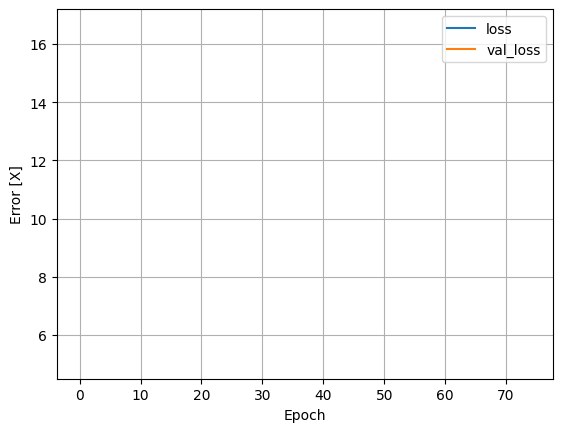

In [ ]:
plot_loss(history)

In [ ]:
test_results_filtrado['x'] = dnn_model_filtrado_x.evaluate(test_features_filtrado_x, test_labels_filtrado_x, verbose=2)

17/17 - 0s - 2ms/step - loss: 0.3626


#### Y com filtro

In [ ]:
dnn_model_filtrado_y = build_and_compile_model(normalizer)
dnn_model_filtrado_y.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 16)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [ ]:
%%time
history = dnn_model_filtrado_y.fit(
    train_features_filtrado_y,
    train_labels_filtrado_y,
    batch_size=20,
    validation_split=0.2,
    verbose=2, epochs=75)

Epoch 1/75
87/87 - 2s - 25ms/step - loss: 1.5716 - val_loss: 1.4347
Epoch 2/75
87/87 - 0s - 6ms/step - loss: 1.3284 - val_loss: 1.1909
Epoch 3/75
87/87 - 0s - 3ms/step - loss: 1.0214 - val_loss: 0.9591
Epoch 4/75
87/87 - 0s - 4ms/step - loss: 0.7719 - val_loss: 0.7966
Epoch 5/75
87/87 - 0s - 3ms/step - loss: 0.6252 - val_loss: 0.6586
Epoch 6/75
87/87 - 0s - 4ms/step - loss: 0.5265 - val_loss: 0.5617
Epoch 7/75
87/87 - 0s - 3ms/step - loss: 0.4590 - val_loss: 0.4982
Epoch 8/75
87/87 - 0s - 3ms/step - loss: 0.4194 - val_loss: 0.4549
Epoch 9/75
87/87 - 0s - 3ms/step - loss: 0.3953 - val_loss: 0.4259
Epoch 10/75
87/87 - 0s - 5ms/step - loss: 0.3809 - val_loss: 0.4126
Epoch 11/75
87/87 - 0s - 4ms/step - loss: 0.3636 - val_loss: 0.3970
Epoch 12/75
87/87 - 0s - 4ms/step - loss: 0.3523 - val_loss: 0.3795
Epoch 13/75
87/87 - 1s - 7ms/step - loss: 0.3404 - val_loss: 0.3788
Epoch 14/75
87/87 - 1s - 7ms/step - loss: 0.3335 - val_loss: 0.3624
Epoch 15/75
87/87 - 1s - 7ms/step - loss: 0.3231 - val_l

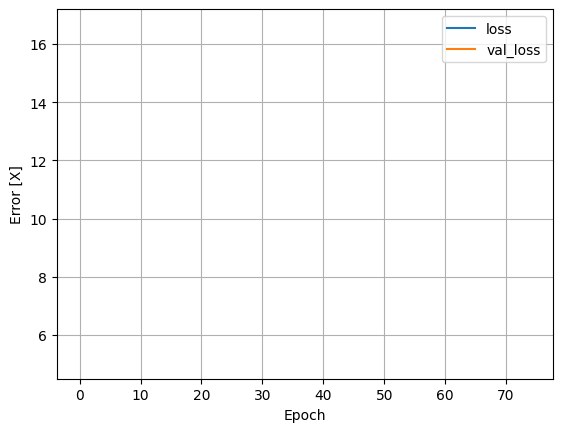

In [ ]:
plot_loss(history)

In [ ]:
test_results_filtrado['y'] = dnn_model_filtrado_y.evaluate(test_features_filtrado_y, test_labels_filtrado_y, verbose=2)

17/17 - 0s - 2ms/step - loss: 0.2534


#### Z com filtro

In [ ]:
dnn_model_filtrado_z = build_and_compile_model(normalizer)
dnn_model_filtrado_z.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 16)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [ ]:
%%time
history = dnn_model_filtrado_z.fit(
    train_features_filtrado_z,
    train_labels_filtrado_z,
    batch_size=20,
    validation_split=0.2,
    verbose=2, epochs=75)

Epoch 1/75
87/87 - 2s - 25ms/step - loss: 1.2800 - val_loss: 1.1171
Epoch 2/75
87/87 - 0s - 5ms/step - loss: 1.0558 - val_loss: 0.9883
Epoch 3/75
87/87 - 0s - 2ms/step - loss: 0.8985 - val_loss: 0.8723
Epoch 4/75
87/87 - 0s - 4ms/step - loss: 0.7547 - val_loss: 0.7572
Epoch 5/75
87/87 - 0s - 3ms/step - loss: 0.6565 - val_loss: 0.6944
Epoch 6/75
87/87 - 0s - 4ms/step - loss: 0.6108 - val_loss: 0.6732
Epoch 7/75
87/87 - 0s - 4ms/step - loss: 0.5825 - val_loss: 0.6531
Epoch 8/75
87/87 - 0s - 4ms/step - loss: 0.5579 - val_loss: 0.6307
Epoch 9/75
87/87 - 1s - 7ms/step - loss: 0.5373 - val_loss: 0.6080
Epoch 10/75
87/87 - 1s - 8ms/step - loss: 0.5182 - val_loss: 0.5906
Epoch 11/75
87/87 - 1s - 6ms/step - loss: 0.5038 - val_loss: 0.5665
Epoch 12/75
87/87 - 0s - 3ms/step - loss: 0.4876 - val_loss: 0.5472
Epoch 13/75
87/87 - 0s - 3ms/step - loss: 0.4733 - val_loss: 0.5321
Epoch 14/75
87/87 - 0s - 3ms/step - loss: 0.4622 - val_loss: 0.5182
Epoch 15/75
87/87 - 0s - 3ms/step - loss: 0.4549 - val_l

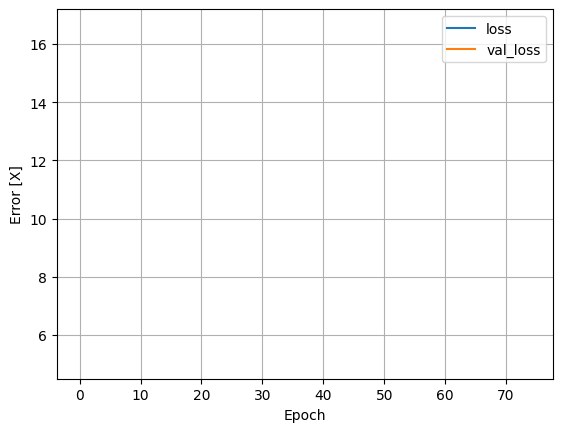

In [ ]:
plot_loss(history)

In [ ]:
test_results_filtrado['z'] = dnn_model_filtrado_z.evaluate(test_features_filtrado_z, test_labels_filtrado_z, verbose=2)

17/17 - 0s - 2ms/step - loss: 0.3827


####Energia com filtro

In [ ]:
dnn_model_filtrado_e = build_and_compile_model(normalizer)
dnn_model_filtrado_e.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization)      │ (None, 16)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 33 (136.00 B)

In [ ]:
%%time
history = dnn_model_filtrado_e.fit(
    train_features_filtrado_e,
    train_labels_filtrado_e,
    batch_size=20,
    validation_split=0.2,
    verbose=2, epochs=75)

Epoch 1/75
87/87 - 2s - 26ms/step - loss: 17.2886 - val_loss: 16.7760
Epoch 2/75
87/87 - 0s - 4ms/step - loss: 16.5773 - val_loss: 15.4867
Epoch 3/75
87/87 - 1s - 7ms/step - loss: 14.3536 - val_loss: 12.2880
Epoch 4/75
87/87 - 0s - 4ms/step - loss: 9.9888 - val_loss: 9.7506
Epoch 5/75
87/87 - 0s - 4ms/step - loss: 8.3452 - val_loss: 9.3108
Epoch 6/75
87/87 - 1s - 7ms/step - loss: 7.9371 - val_loss: 9.0048
Epoch 7/75
87/87 - 0s - 3ms/step - loss: 7.6653 - val_loss: 8.7189
Epoch 8/75
87/87 - 0s - 3ms/step - loss: 7.4649 - val_loss: 8.5245
Epoch 9/75
87/87 - 0s - 4ms/step - loss: 7.3003 - val_loss: 8.3365
Epoch 10/75
87/87 - 0s - 4ms/step - loss: 7.1519 - val_loss: 8.1452
Epoch 11/75
87/87 - 0s - 3ms/step - loss: 7.0296 - val_loss: 8.0108
Epoch 12/75
87/87 - 0s - 4ms/step - loss: 6.8897 - val_loss: 7.8473
Epoch 13/75
87/87 - 0s - 3ms/step - loss: 6.7643 - val_loss: 7.6515
Epoch 14/75
87/87 - 0s - 3ms/step - loss: 6.6372 - val_loss: 7.5467
Epoch 15/75
87/87 - 0s - 3ms/step - loss: 6.5107 -

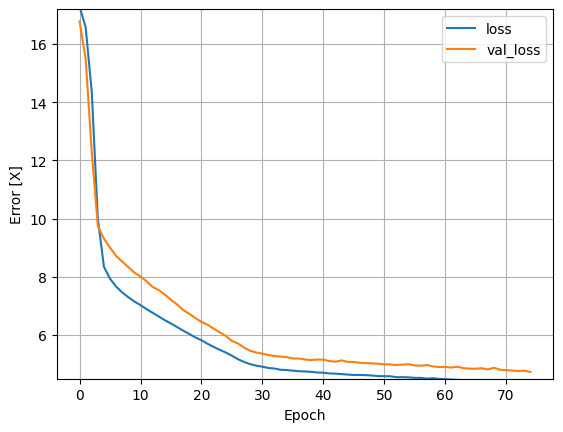

In [ ]:
plot_loss(history)

In [ ]:
test_results_filtrado['e'] = dnn_model_filtrado_e.evaluate(test_features_filtrado_e, test_labels_filtrado_e, verbose=2)

17/17 - 0s - 2ms/step - loss: 5.1123


### Gráficos gerais

#### X com filtro

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


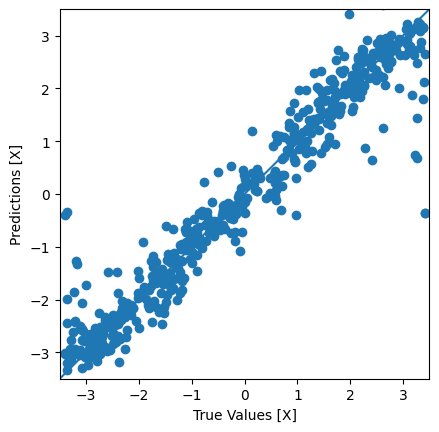

In [ ]:
test_predictions_filtrado_x = dnn_model_filtrado_x.predict(test_features_filtrado_x).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_filtrado_x, test_predictions_filtrado_x)
plt.xlabel('True Values [X]')
plt.ylabel('Predictions [X]')
lims = [-3.5, 3.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions_filtrado_x_reshaped = test_predictions_filtrado_x.reshape(-1, 1)
print(test_predictions_filtrado_x_reshaped.shape)

(540, 1)


In [ ]:
error_filtrado_x = test_predictions_filtrado_x_reshaped - test_labels_filtrado_x

In [ ]:
media_filtrado_x = np.mean(error_filtrado_x)
desvio_padrao_filtrado_x = np.std(error_filtrado_x)

print(media_filtrado_x)

0.03339230618789724


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
print(desvio_padrao_filtrado_x)

X    0.639796
dtype: float64


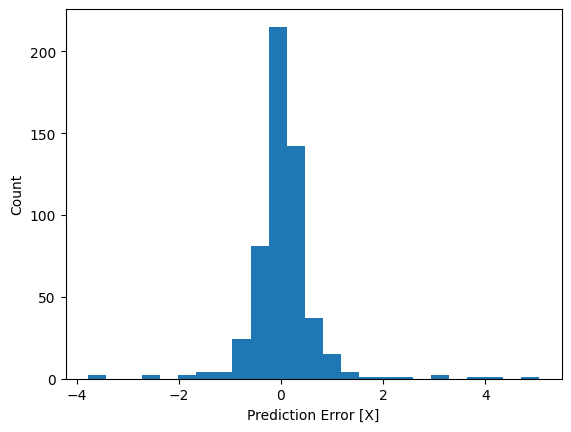

In [ ]:
plt.hist(error_filtrado_x, bins=25)
plt.xlabel('Prediction Error [X]')
_ = plt.ylabel('Count')

In [ ]:
juncao_x = np.hstack((test_labels_filtrado_x, test_predictions_filtrado_x_reshaped, error_filtrado_x))
print(juncao_x.shape)

(540, 3)


In [ ]:
filtro_x = (juncao_x[:, 0] > -2.5) & (juncao_x[:, 0] < 2.5)
juncao_filtrado_x = juncao_x[filtro_x]
print(juncao_filtrado_x.shape)

(387, 3)


In [ ]:
error_filtrado_MenosDesvio_x = juncao_filtrado_x[:, 2]

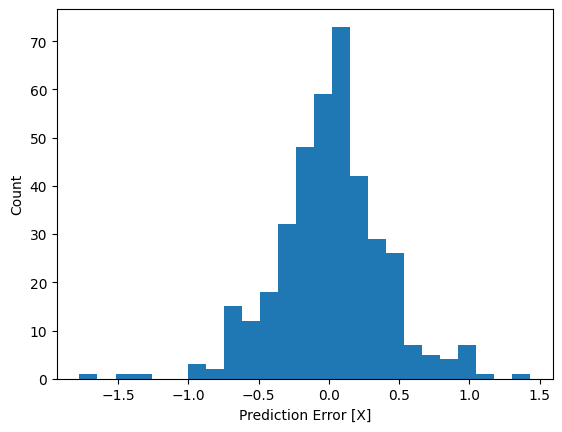

In [ ]:
plt.hist(error_filtrado_MenosDesvio_x, bins=25)
plt.xlabel('Prediction Error [X]')
_ = plt.ylabel('Count')

In [ ]:
media_filtrado_MenosDesvio_x = np.mean(error_filtrado_MenosDesvio_x)
desvio_padrao_filtrado_MenosDesvio_x = np.std(error_filtrado_MenosDesvio_x)

print(media_filtrado_MenosDesvio_x)

0.00865958435164924


In [ ]:
print(desvio_padrao_filtrado_MenosDesvio_x)

0.3907362922828198


In [ ]:
test_labels_filtrado_MenosDesvio_x = juncao_filtrado_x[:,0]
test_predictions_filtrado_MenosDesvio_x = juncao_filtrado_x[:,1]

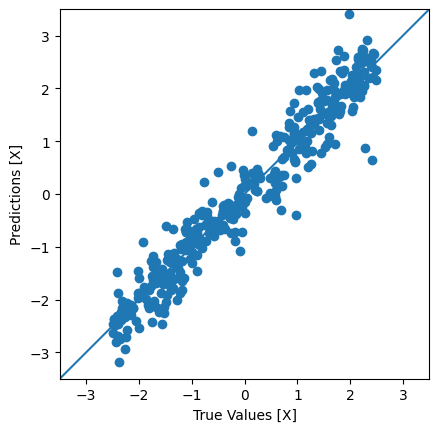

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_filtrado_MenosDesvio_x, test_predictions_filtrado_MenosDesvio_x)
plt.xlabel('True Values [X]')
plt.ylabel('Predictions [X]')
lims = [-3.5, 3.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

####Y com filtro

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


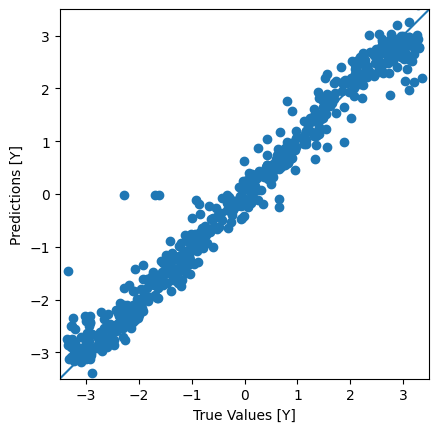

In [ ]:
test_predictions_filtrado_y = dnn_model_filtrado_y.predict(test_features_filtrado_y).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_filtrado_y, test_predictions_filtrado_y)
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
lims = [-3.5, 3.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions_filtrado_y_reshaped = test_predictions_filtrado_y.reshape(-1, 1)
print(test_predictions_filtrado_y_reshaped.shape)

(540, 1)


In [ ]:
error_filtrado_y = test_predictions_filtrado_y_reshaped - test_labels_filtrado_y

In [ ]:
media_filtrado_y = np.mean(error_filtrado_y)
desvio_padrao_filtrado_y = np.std(error_filtrado_y)

print(media_filtrado_y)

0.013151694789390872


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
print(desvio_padrao_filtrado_y)

Y    0.393264
dtype: float64


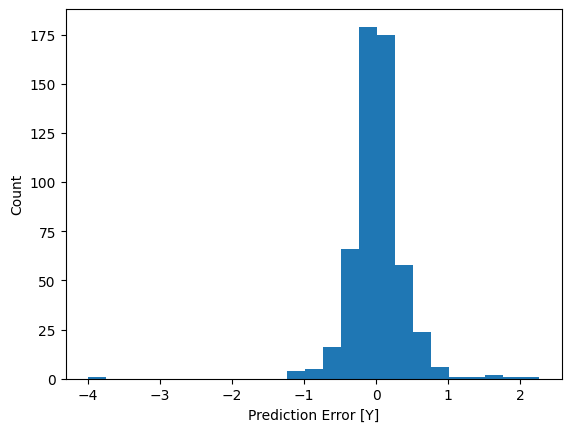

In [ ]:
plt.hist(error_filtrado_y, bins=25)
plt.xlabel('Prediction Error [Y]')
_ = plt.ylabel('Count')

In [ ]:
juncao_y = np.hstack((test_labels_filtrado_y, test_predictions_filtrado_y_reshaped, error_filtrado_y))
print(juncao_y.shape)

filtro_y = (juncao_y[:, 0] > -2.5) & (juncao_y[:, 0] < 2.5)
juncao_filtrado_y = juncao_y[filtro_y]
print(juncao_filtrado_y.shape)

error_filtrado_MenosDesvio_y = juncao_filtrado_y[:, 2]

(540, 3)
(389, 3)


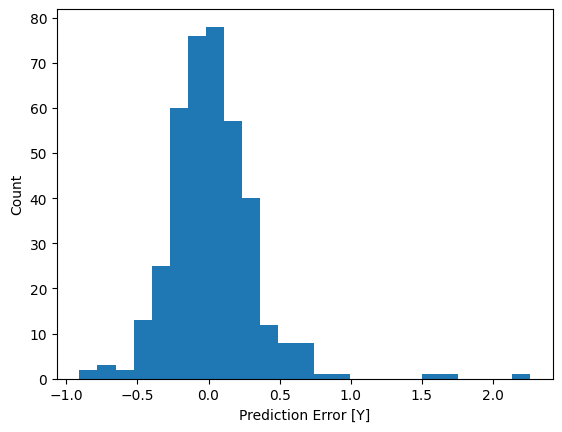

In [ ]:
plt.hist(error_filtrado_MenosDesvio_y, bins=25)
plt.xlabel('Prediction Error [Y]')
_ = plt.ylabel('Count')

In [ ]:
media_filtrado_MenosDesvio_y = np.mean(error_filtrado_MenosDesvio_y)
desvio_padrao_filtrado_MenosDesvio_y = np.std(error_filtrado_MenosDesvio_y)

print(media_filtrado_MenosDesvio_y)

0.02379039695357142


In [ ]:
print(desvio_padrao_filtrado_MenosDesvio_y)

0.30844110902553834


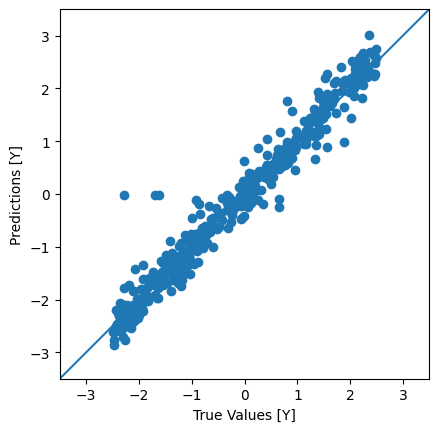

In [ ]:
test_labels_filtrado_MenosDesvio_y = juncao_filtrado_y[:,0]
test_predictions_filtrado_MenosDesvio_y = juncao_filtrado_y[:,1]

a = plt.axes(aspect='equal')
plt.scatter(test_labels_filtrado_MenosDesvio_y, test_predictions_filtrado_MenosDesvio_y)
plt.xlabel('True Values [Y]')
plt.ylabel('Predictions [Y]')
lims = [-3.5, 3.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

####Z com filtro

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


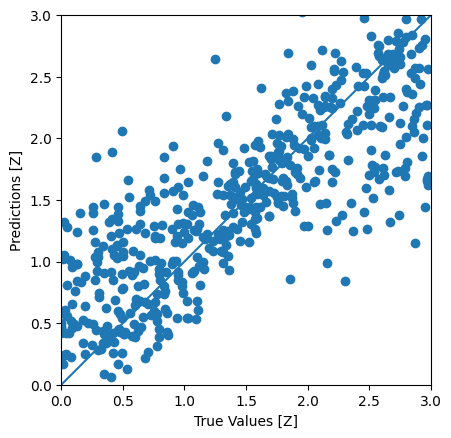

In [ ]:
test_predictions_filtrado_z = dnn_model_filtrado_z.predict(test_features_filtrado_z).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_filtrado_z, test_predictions_filtrado_z)
plt.xlabel('True Values [Z]')
plt.ylabel('Predictions [Z]')
lims = [0, 3.]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions_filtrado_z_reshaped = test_predictions_filtrado_z.reshape(-1, 1)
print(test_predictions_filtrado_z_reshaped.shape)

(540, 1)


In [ ]:
error_filtrado_z = test_predictions_filtrado_z_reshaped - test_labels_filtrado_z

In [ ]:
media_filtrado_z = np.mean(error_filtrado_z)
desvio_padrao_filtrado_z = np.std(error_filtrado_z)

print(media_filtrado_z)

0.038759775805252576


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
print(desvio_padrao_filtrado_z)

Z    0.514261
dtype: float64


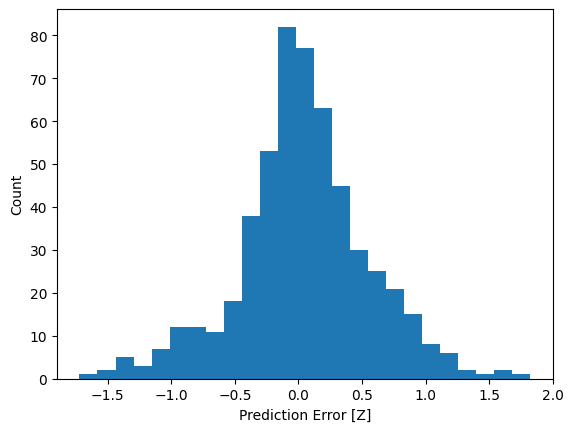

In [ ]:
plt.hist(error_filtrado_z, bins=25)
plt.xlabel('Prediction Error [Z]')
_ = plt.ylabel('Count')

In [ ]:
juncao_z = np.hstack((test_labels_filtrado_z, test_predictions_filtrado_z_reshaped, error_filtrado_z))
print(juncao_y.shape)

filtro_z = (juncao_z[:, 0] > -2.5) & (juncao_z[:, 0] < 2.5)
juncao_filtrado_z = juncao_z[filtro_z]
print(juncao_filtrado_z.shape)

error_filtrado_MenosDesvio_z = juncao_filtrado_z[:, 2]

(540, 3)
(445, 3)


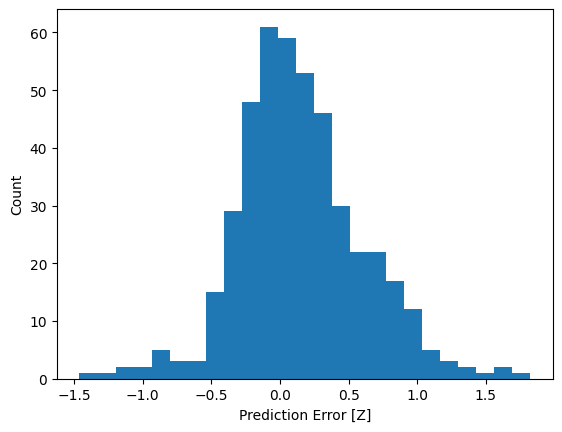

In [ ]:
plt.hist(error_filtrado_MenosDesvio_z, bins=25)
plt.xlabel('Prediction Error [Z]')
_ = plt.ylabel('Count')

In [ ]:
media_filtrado_MenosDesvio_z = np.mean(error_filtrado_MenosDesvio_z)
desvio_padrao_filtrado_MenosDesvio_z = np.std(error_filtrado_MenosDesvio_z)

print(media_filtrado_MenosDesvio_z)

0.14735839246765953


In [ ]:
print(desvio_padrao_filtrado_MenosDesvio_z)

0.4564115886760558


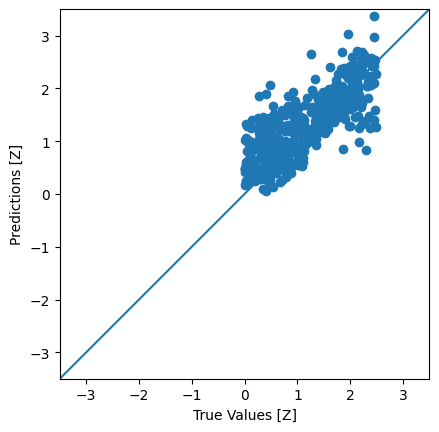

In [ ]:
test_labels_filtrado_MenosDesvio_z = juncao_filtrado_z[:,0]
test_predictions_filtrado_MenosDesvio_z = juncao_filtrado_z[:,1]

a = plt.axes(aspect='equal')
plt.scatter(test_labels_filtrado_MenosDesvio_z, test_predictions_filtrado_MenosDesvio_z)
plt.xlabel('True Values [Z]')
plt.ylabel('Predictions [Z]')
lims = [-3.5, 3.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

#### Energia com Filtro

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


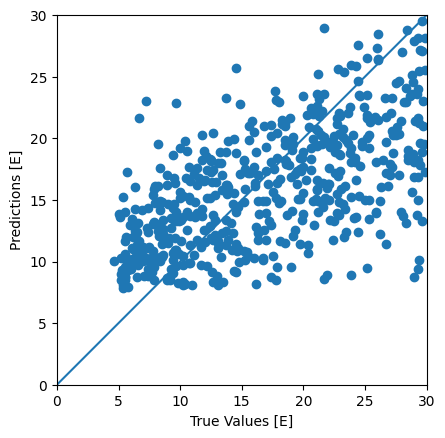

In [ ]:
test_predictions_filtrado_e = dnn_model_filtrado_e.predict(test_features_filtrado_e).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels_filtrado_e, test_predictions_filtrado_e)
plt.xlabel('True Values [E]')
plt.ylabel('Predictions [E]')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
test_predictions_filtrado_e_reshaped = test_predictions_filtrado_e.reshape(-1, 1)
print(test_predictions_filtrado_e_reshaped.shape)

(540, 1)


In [ ]:
error_filtrado_e = test_predictions_filtrado_e_reshaped - test_labels_filtrado_e

In [ ]:
media_filtrado_e = np.mean(error_filtrado_e)
desvio_padrao_filtrado_e = np.std(error_filtrado_e)

print(media_filtrado_e)

-0.5608876643357453


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
print(desvio_padrao_filtrado_e)

E    7.169171
dtype: float64


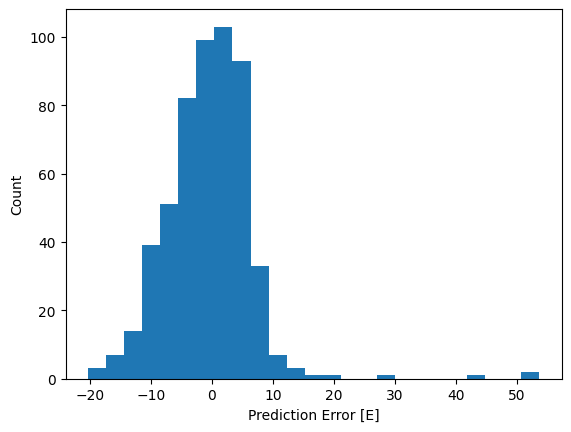

In [ ]:
plt.hist(error_filtrado_e, bins=25)
plt.xlabel('Prediction Error [E]')
_ = plt.ylabel('Count')

###Demais gráficos

In [ ]:
final_validation_features = final_validation_dataset[['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16']]
final_validation_labels_e = final_validation_dataset[['E']]
print(final_validation_labels_e.shape)

(745, 1)


24/24 [==============================] - 0s 2ms/step


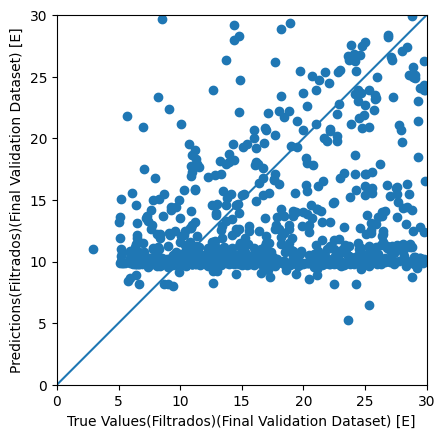

In [ ]:
test_predictions_final_validation_filtrado_e = dnn_model_filtrado_e.predict(final_validation_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(final_validation_labels_e, test_predictions_final_validation_filtrado_e)
plt.xlabel('True Values(Filtrados)(Final Validation Dataset) [E]')
plt.ylabel('Predictions(Filtrados)(Final Validation Dataset) [E]')
lims = [0, 30]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)